In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape
#3d array with 60000 images with 28*28 pixels

(60000, 28, 28)

In [6]:
 x_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

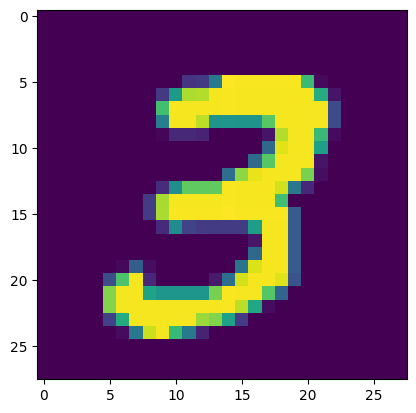

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7])

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [29]:
history=model.fit(x_train,y_train,epochs=26,validation_split=0.2)

Epoch 1/26
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2897 - val_loss: 0.1653
Epoch 2/26
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1213 - val_loss: 0.1327
Epoch 3/26
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0820 - val_loss: 0.1036
Epoch 4/26
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0625 - val_loss: 0.0949
Epoch 5/26
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0482 - val_loss: 0.1019
Epoch 6/26
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0399 - val_loss: 0.0963
Epoch 7/26
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0311 - val_loss: 0.1077
Epoch 8/26
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0283 - val_loss: 0.1163
Epoch 9/26
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0205 - val_loss: 0.1170
Epoch 10/26
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0

In [32]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [33]:
y_pred=y_prob.argmax(axis=1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764

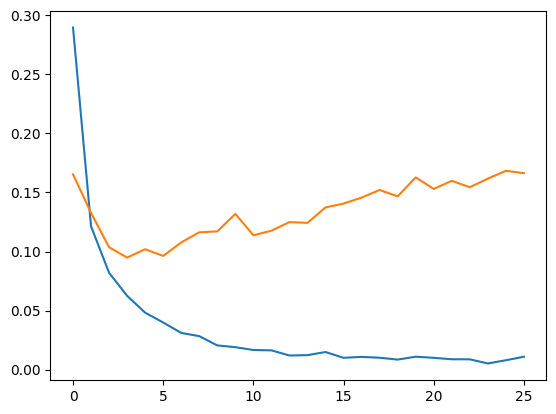

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

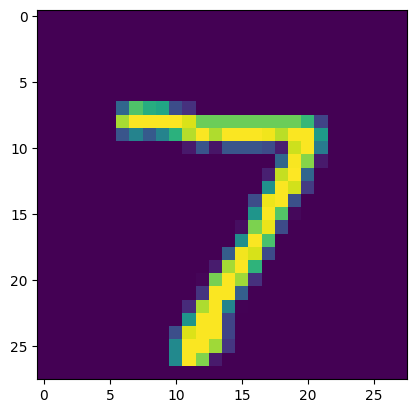

In [36]:
plt.imshow(x_test[0])

In [37]:
model.predict(x_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 41ms/step


array([[2.6065716e-20, 5.9374938e-17, 4.4097166e-15, 2.4641733e-13,
        6.9025671e-28, 9.9531789e-18, 4.7919845e-29, 1.0000000e+00,
        1.2649572e-16, 2.1793633e-13]], dtype=float32)

In [38]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 42ms/step


array([7])